# Use Case 1 - Methionine Concentration Prediction

The goal of the use case is to understand AutoML capabilities of Google Cloud Platform. 

## Dataset

There are 22 features that consist of senser data available at a frequency of every 5 minutes. Addtional 4 features are taken from lab samples every 2 hours.


In [ ]:
!pip install --quiet 

In [1]:
!pip install --quiet ipython-autotime pandas_gbq
%load_ext autotime

#importing libraries needed for the project
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('case_1_adj_date.csv', parse_dates=['utc_time'])

time: 574 ms


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   utc_time  175187 non-null  datetime64[ns]
 1   785c413f  175187 non-null  float64       
 2   63f756c6  175187 non-null  float64       
 3   1c1d2839  175187 non-null  float64       
 4   747e9f92  175187 non-null  float64       
 5   e5dc1992  175187 non-null  float64       
 6   66075f22  175187 non-null  float64       
 7   6015d47c  175187 non-null  float64       
 8   3300aaff  175187 non-null  float64       
 9   6e261b5a  175187 non-null  float64       
 10  9bf85059  175187 non-null  float64       
 11  db1e6439  175187 non-null  float64       
 12  57566c9d  175187 non-null  float64       
 13  92948314  175187 non-null  float64       
 14  47cb7007  175187 non-null  float64       
 15  ad107855  175187 non-null  float64       
 16  84fb9c76  175187 non-null  float64    

In [4]:
df

,utc_time,785c413f,63f756c6,1c1d2839,747e9f92,e5dc1992,66075f22,6015d47c,3300aaff,6e261b5a,...,3a4bffd0,4b65b7f5,a8f608b7,d6150a71,0f59d734,2b5ebd41,b863be9b,3745e5ec,052838d6,9683faac
0,2018-02-16 22:05:00,1.208985,954.9,1048.0,139.7,20.7,11.0,0.0,84.8,16.0,...,93.5,1157.0,82.1,148,?????????,?????????,??????,55.0,61.2,2.5
1,2018-02-16 22:10:00,1.207249,954.9,1048.0,139.8,20.4,11.3,0.0,85.1,16.0,...,93.4,1157.0,82.1,148,?????????,?????????,??????,54.8,61.1,2.5
2,2018-02-16 22:15:00,1.209482,954.9,1048.0,139.9,20.8,11.5,0.0,86.3,16.0,...,93.4,1157.0,82.1,148,?????????,?????????,??????,54.7,61.0,2.5
3,2018-02-16 22:20:00,1.209580,954.9,1048.0,140.0,20.7,8.0,0.0,87.2,16.9,...,93.4,1157.0,82.1,148,?????????,?????????,??????,54.6,60.9,2.5
4,2018-02-16 22:25:00,1.208954,954.9,1048.0,140.1,20.7,7.7,0.0,86.4,17.0,...,93.3,1157.0,82.1,148,?????????,?????????,??????,54.6,61.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175182,2019-10-18 06:35:00,1.096748,-0.1,1047.0,151.4,2.9,30.5,63.6,0.0,17.0,...,81.2,1164.0,81.2,151,NaN,NaN,49.1,48.5,68.2,3.0
175183,2019-10-18 06:40:00,1.046009,-0.1,1047.0,150.7,2.9,28.0,52.9,0.0,17.0,...,80.7,1164.0,81.2,151,NaN,NaN,46.4,48.0,67.5,2.9
175184,2019-10-18 06:45:00,1.140730,-0.1,1047.0,150.1,2.9,1.8,49.5,0.0,17.1,...,80.6,1162.0,81.2,151,NaN,NaN,44.1,47.6,64.0,2.9
175185,2019-10-18 06:50:00,1.145774,-0.1,1047.0,148.0,2.9,3.8,38.0,0.0,17.1,...,80.0,1159.0,81.2,151,NaN,NaN,43.9,46.5,60.1,2.9


time: 137 ms


In [5]:
sensor_tags = ['785c413f',
                '63f756c6',
                '052838d6',
                '66075f22',
                '6015d47c',
                '3300aaff',
                'db1e6439',
                '6e261b5a',
                '9bf85059',
                '57566c9d',
                '3745e5ec',
                '4b65b7f5',
                '3a4bffd0',
                '1c1d2839',
                '92948314',
                'e5dc1992',
                '747e9f92',
                '47cb7007',
                'ad107855',
                '9683faac'
]
excluded_sensor_tags = ['5e4ad263', 'b863be9b']
df[sensor_tags]

,785c413f,63f756c6,052838d6,66075f22,6015d47c,3300aaff,db1e6439,6e261b5a,9bf85059,57566c9d,3745e5ec,4b65b7f5,3a4bffd0,1c1d2839,92948314,e5dc1992,747e9f92,47cb7007,ad107855,9683faac
0,1.208985,954.9,61.2,11.0,0.0,84.8,11.9,16.0,16.0,37.3,55.0,1157.0,93.5,1048.0,0.0,20.7,139.7,2.3,0.3,2.5
1,1.207249,954.9,61.1,11.3,0.0,85.1,11.9,16.0,16.0,37.5,54.8,1157.0,93.4,1048.0,0.0,20.4,139.8,2.3,0.4,2.5
2,1.209482,954.9,61.0,11.5,0.0,86.3,11.7,16.0,16.0,37.6,54.7,1157.0,93.4,1048.0,0.0,20.8,139.9,2.3,0.4,2.5
3,1.209580,954.9,60.9,8.0,0.0,87.2,11.8,16.9,17.2,37.8,54.6,1157.0,93.4,1048.0,0.0,20.7,140.0,2.3,0.4,2.5
4,1.208954,954.9,61.0,7.7,0.0,86.4,11.9,17.0,17.3,37.9,54.6,1157.0,93.3,1048.0,0.0,20.7,140.1,2.3,0.4,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175182,1.096748,-0.1,68.2,30.5,63.6,0.0,13.0,17.0,18.0,76.8,48.5,1164.0,81.2,1047.0,0.0,2.9,151.4,1.8,0.6,3.0
175183,1.046009,-0.1,67.5,28.0,52.9,0.0,12.9,17.0,18.0,73.2,48.0,1164.0,80.7,1047.0,0.0,2.9,150.7,1.8,0.6,2.9
175184,1.140730,-0.1,64.0,1.8,49.5,0.0,12.8,17.1,18.0,66.3,47.6,1162.0,80.6,1047.0,0.0,2.9,150.1,1.7,0.5,2.9
175185,1.145774,-0.1,60.1,3.8,38.0,0.0,11.4,17.1,18.0,56.6,46.5,1159.0,80.0,1047.0,0.0,2.9,148.0,1.7,0.5,2.9


time: 48.3 ms


In [6]:
lab_tags = ['84fb9c76',
            'a8373667',
            '0f59d734',
            '2b5ebd41'
]
df[lab_tags].head(50)

,84fb9c76,a8373667,0f59d734,2b5ebd41
0,95.9,186,?????????,?????????
1,95.9,186,?????????,?????????
2,95.9,186,?????????,?????????
3,95.9,186,?????????,?????????
4,95.9,186,?????????,?????????
5,95.9,186,?????????,?????????
6,95.9,186,?????????,?????????
7,95.9,186,?????????,?????????
8,95.9,186,?????????,?????????
9,95.9,186,?????????,?????????


time: 18.5 ms


In [7]:
ylabels = ['a8f608b7',
            'd6150a71'
]
df[ylabels]

,a8f608b7,d6150a71
0,82.1,148
1,82.1,148
2,82.1,148
3,82.1,148
4,82.1,148
...,...,...
175182,81.2,151
175183,81.2,151
175184,81.2,151
175185,81.2,151


time: 10.7 ms


In [8]:
df_export = df.rename(columns={"785c413f": "feat_01",
                       "63f756c6": "feat_02",
                       "1c1d2839": "feat_03",
                       "747e9f92": "feat_04",
                       "e5dc1992": "feat_05",
                       "66075f22": "feat_06",
                       "6015d47c": "feat_07",
                       "3300aaff": "feat_08",
                       "6e261b5a": "feat_09",
                       "9bf85059": "feat_10",
                       "db1e6439": "feat_11",
                       "57566c9d": "feat_12",
                       "92948314": "feat_13",
                       "47cb7007": "feat_14",
                       "ad107855": "feat_15",
                       "54a1f167": "feat_16",
                       "3a4bffd0": "feat_17",
                       "4b65b7f5": "feat_18",
                       "b863be9b": "feat_19",
                       "3745e5ec": "feat_20",
                       "052838d6": "feat_21",
                       "9683faac": "feat_22",
                       "84fb9c76": "lab_tags_01",
                       "a8373667": "lab_tags_02",
                       "0f59d734": "lab_tags_03",
                       "2b5ebd41": "lab_tags_04",
                       "a8f608b7": "ylabel_01",
                       "d6150a71": "ylabel_02"})
features = [f'feat_{(i+1):02d}' for i in range(22) if i not in [18]]
labels = ['ylabel_01', 'ylabel_02']

time: 115 ms


In [9]:
df_export

,utc_time,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,...,feat_17,feat_18,ylabel_01,ylabel_02,lab_tags_03,lab_tags_04,feat_19,feat_20,feat_21,feat_22
0,2018-02-16 22:05:00,1.208985,954.9,1048.0,139.7,20.7,11.0,0.0,84.8,16.0,...,93.5,1157.0,82.1,148,?????????,?????????,??????,55.0,61.2,2.5
1,2018-02-16 22:10:00,1.207249,954.9,1048.0,139.8,20.4,11.3,0.0,85.1,16.0,...,93.4,1157.0,82.1,148,?????????,?????????,??????,54.8,61.1,2.5
2,2018-02-16 22:15:00,1.209482,954.9,1048.0,139.9,20.8,11.5,0.0,86.3,16.0,...,93.4,1157.0,82.1,148,?????????,?????????,??????,54.7,61.0,2.5
3,2018-02-16 22:20:00,1.209580,954.9,1048.0,140.0,20.7,8.0,0.0,87.2,16.9,...,93.4,1157.0,82.1,148,?????????,?????????,??????,54.6,60.9,2.5
4,2018-02-16 22:25:00,1.208954,954.9,1048.0,140.1,20.7,7.7,0.0,86.4,17.0,...,93.3,1157.0,82.1,148,?????????,?????????,??????,54.6,61.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175182,2019-10-18 06:35:00,1.096748,-0.1,1047.0,151.4,2.9,30.5,63.6,0.0,17.0,...,81.2,1164.0,81.2,151,NaN,NaN,49.1,48.5,68.2,3.0
175183,2019-10-18 06:40:00,1.046009,-0.1,1047.0,150.7,2.9,28.0,52.9,0.0,17.0,...,80.7,1164.0,81.2,151,NaN,NaN,46.4,48.0,67.5,2.9
175184,2019-10-18 06:45:00,1.140730,-0.1,1047.0,150.1,2.9,1.8,49.5,0.0,17.1,...,80.6,1162.0,81.2,151,NaN,NaN,44.1,47.6,64.0,2.9
175185,2019-10-18 06:50:00,1.145774,-0.1,1047.0,148.0,2.9,3.8,38.0,0.0,17.1,...,80.0,1159.0,81.2,151,NaN,NaN,43.9,46.5,60.1,2.9


time: 84.3 ms


In [12]:
project_id = !gcloud config get-value project
df_export.to_gbq('poc_uc_1.sensor_data_with_labels', project_id=project_id[0], if_exists='replace')

1it [00:18, 18.75s/it]

time: 20.3 s


In [13]:
pd.concat([pd.to_datetime(df_export['utc_time'], unit='ns').apply(lambda t: t.to_pydatetime()), df_export[labels]], axis=1).dropna().values

array([[Timestamp('2018-02-16 22:05:00'), 82.1, 148],
       [Timestamp('2018-02-16 22:10:00'), 82.1, 148],
       [Timestamp('2018-02-16 22:15:00'), 82.1, 148],
       ...,
       [Timestamp('2019-10-18 06:45:00'), 81.2, 151],
       [Timestamp('2019-10-18 06:50:00'), 81.2, 151],
       [Timestamp('2019-10-18 06:55:00'), 81.2, 151]], dtype=object)

time: 1.61 s


In [14]:
from datetime import datetime
y_timed = pd.concat([df_export['utc_time'].apply(lambda t: int(t.timestamp())), df_export[labels]], axis=1).dropna().values
y_timed[-1,0]+y_timed[-1,0]-y_timed[-2,0]
#int(datetime.now().timestamp())

1571382000.0

time: 891 ms


## Visual Analysis

In [15]:
!pip3 install -q facets-overview

# Introduce facets
from IPython.core.display import display, HTML
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64
import uuid

def facets_overview(df):
    gfsg = GenericFeatureStatisticsGenerator()
    proto = gfsg.ProtoFromDataFrames([{'name': 'df', 'table': df}])
    protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

    HTML_TEMPLATE = """
            <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
            <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
            <facets-overview id="facets-overview-{uuid}"></facets-overview>
            <script>
              document.querySelector("#facets-overview-{uuid}").protoInput = "{protostr}";
            </script>"""

    html = HTML_TEMPLATE.format(protostr=protostr, uuid=uuid.uuid4())
    display(HTML(html))

def facets_dive(df): 
    HTML_TEMPLATE = """
            <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
            <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
            <facets-dive id="facets-dive-{uuid}" height="500"></facets-dive>
            <script>
              document.querySelector("#facets-dive-{uuid}").data = {jsonstr};
            </script>"""

    jsonstr = df.to_json(orient='records')
    html = HTML_TEMPLATE.format(jsonstr=jsonstr, uuid=uuid.uuid4())
    display(HTML(html))

time: 2.5 s


In [29]:
#facets_overview(df)

time: 345 µs


In [28]:
#facets_dive(df)

time: 353 µs


## TensorFlow Experiments

In [18]:
import tensorflow as tf

EPOCHS = 50
STEPS = 300
BATCH_SIZE = 300
print(f"Training with {EPOCHS*STEPS*BATCH_SIZE} in {EPOCHS} epochs samples.")

VAL_SAMPLES = 15000
VAL_STEPS = 30
VAL_BATCH_SIZE = int(VAL_SAMPLES / VAL_STEPS / EPOCHS)

Training with 4500000 in 50 epochs samples.
time: 2.33 s


In [19]:
cleaned_df = df_export[features+labels].dropna()
#cleaned_df = cleaned_df[cleaned_df.applymap(np.isreal).all(1)]

X = cleaned_df[features]
Y = cleaned_df[labels]

tf_dataset = (tf.data.Dataset.from_tensor_slices((dict(X), Y)).repeat()
                  .prefetch(tf.data.experimental.AUTOTUNE))
tf_train_dataset = tf_dataset.skip(VAL_SAMPLES).batch(VAL_BATCH_SIZE)
tf_val_dataset = tf_dataset.batch(BATCH_SIZE)

time: 173 ms


In [20]:
feature_columns = {
    name : tf.feature_column.numeric_column(name) 
          for name in features}

inputs = {
    colname : tf.keras.layers.Input(name=colname, shape=(), dtype='float32') 
          for colname in feature_columns.keys()}

time: 28.6 ms


In [21]:
feature_spec = list(feature_columns.values())

raw_features = tf.keras.layers.DenseFeatures(feature_spec, name='raw_features')(inputs)
hidden_1 = tf.keras.layers.Dense(120, name='hidden_1')(raw_features)
hidden_2 = tf.keras.layers.Dense(60, name='hidden_2')(hidden_1)
output = tf.keras.layers.Dense(2, name='outputs')(hidden_2)
model = tf.keras.Model(inputs, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
feat_01 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
feat_02 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
feat_03 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
feat_04 (InputLayer)            [(None,)]            0                                            
______________________________________________________________________________________________

In [22]:
model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])
tf.keras.utils.plot_model(model, 'use_case_naive_tf_nn.png', show_shapes=False, rankdir='TB')

history = model.fit(
    tf_train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS,
    validation_data=tf_val_dataset,
    validation_steps=VAL_STEPS)

Epoch 1/50
300/300 [==============================] - 3s 11ms/step - loss: 5272.9458 - mean_absolute_percentage_error: 56.4921 - val_loss: 1067.9690 - val_mean_absolute_percentage_error: 30.4212
Epoch 2/50
300/300 [==============================] - 2s 6ms/step - loss: 1742.5537 - mean_absolute_percentage_error: 33.5278 - val_loss: 541.4775 - val_mean_absolute_percentage_error: 15.6605
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 474.0510 - mean_absolute_percentage_error: 18.7241 - val_loss: 252.8544 - val_mean_absolute_percentage_error: 12.7503
Epoch 4/50
300/300 [==============================] - 2s 6ms/step - loss: 170.7765 - mean_absolute_percentage_error: 11.1274 - val_loss: 2941.8403 - val_mean_absolute_percentage_error: 50.3070
Epoch 5/50
300/300 [==============================] - 2s 6ms/step - loss: 334.8628 - mean_absolute_percentage_error: 13.9992 - val_loss: 161.2665 - val_mean_absolute_percentage_error: 10.0563
Epoch 6/50
300/300 [===============

In [23]:
predicted_values = model.predict(tf_val_dataset, steps=5000)

time: 1min 19s


In [24]:
model.input.values()

dict_values([<tf.Tensor 'feat_01:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_02:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_03:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_04:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_05:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_06:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_07:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_08:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_09:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_10:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_11:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_12:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_13:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_14:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_15:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_16:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_17:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_18:0' shape=(None,) dtype=float32>, <tf.Tensor 'feat_20:0' shape=(Non

time: 3.4 ms


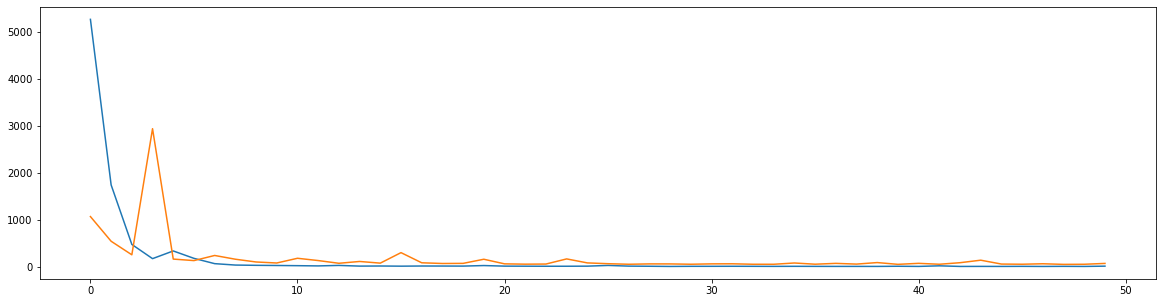

time: 1.17 s


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['figure.figsize'] = (20, 5)

#sns.lineplot(x=range(len(history.history['mean_absolute_percentage_error'])), y='mean_absolute_percentage_error', data=history.history, legend='full')
#plt.show()
sns.lineplot(x=range(len(history.history['loss'])), y='loss', data=history.history, legend='full')
sns.lineplot(x=range(len(history.history['val_loss'])), y='val_loss', data=history.history, legend='full')
plt.show()

In [116]:
model.save('gs://poc_uc_1/models/naive_model.model')

INFO:tensorflow:Assets written to: gs://poc_uc_1/models/naive_model.model/assets
time: 7.15 s


In [90]:
model.save('saved_use_case_1_mm.h5')

time: 43.6 ms


In [153]:
model.evaluate(tf_val_dataset, steps=5000)

5000/5000 [==============================] - 77s 15ms/step - loss: 32.0314 - mean_absolute_percentage_error: 2.9604


[32.03142166137695, 2.9603989124298096]

time: 1min 16s


## LSTM Model

In [26]:
def historic_embedding(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

time: 1.71 ms


In [31]:
PAST_HISTORY = 25
FUTURE_TARGET = 1
STEP = 1
TRAIN_SPLIT = 150000

cleaned_df = df[sensor_tags+ylabels].dropna()

X = cleaned_df[sensor_tags].values
Y = cleaned_df[ylabels].values

x_train_lstm, y_train_lstm = historic_embedding(X, Y, 0, TRAIN_SPLIT, PAST_HISTORY, FUTURE_TARGET, STEP, single_step=True)
x_val_lstm, y_val_lstm = historic_embedding(X, Y, TRAIN_SPLIT, None, PAST_HISTORY, FUTURE_TARGET, STEP, single_step=True)

time: 4.22 s


In [32]:
BUFFER_SIZE = 1000
BATCH_SIZE = 500

import tensorflow as tf

train_data_lstm = (tf.data.Dataset.from_tensor_slices((x_train_lstm, y_train_lstm))
                   .shuffle(BUFFER_SIZE)
                   .batch(BATCH_SIZE).repeat()
                   .cache()
                   .prefetch(tf.data.experimental.AUTOTUNE))

val_data_lstm = (tf.data.Dataset.from_tensor_slices((x_val_lstm, y_val_lstm))
                 .batch(BATCH_SIZE)
                 .repeat()
                 .prefetch(tf.data.experimental.AUTOTUNE))

time: 843 ms


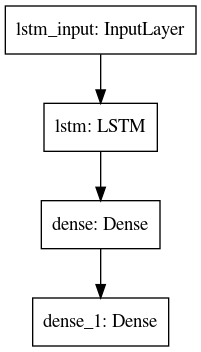

time: 420 ms


In [33]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(PAST_HISTORY, input_shape=x_train_lstm.shape[-2:]),
    tf.keras.layers.Dense(PAST_HISTORY, activation='relu'),
    tf.keras.layers.Dense(2)
])

lstm_model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])
tf.keras.utils.plot_model(lstm_model, 'use_case_lstm_tf_nn.png', show_shapes=False, rankdir='TB')

In [34]:
EPOCHS = 40
STEPS_PER_EPOCH = 200
VALIDATION_STEPS = 10

history = lstm_model.fit(train_data_lstm, epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH, validation_data=val_data_lstm, validation_steps=VALIDATION_STEPS)

Epoch 1/40
200/200 [==============================] - 10s 48ms/step - loss: 13149.0635 - mean_absolute_percentage_error: 96.8224 - val_loss: 11894.8057 - val_mean_absolute_percentage_error: 91.9762
Epoch 2/40
200/200 [==============================] - 9s 46ms/step - loss: 9915.2881 - mean_absolute_percentage_error: 81.2471 - val_loss: 6486.9116 - val_mean_absolute_percentage_error: 63.1908
Epoch 3/40
200/200 [==============================] - 9s 43ms/step - loss: 3502.8584 - mean_absolute_percentage_error: 39.7537 - val_loss: 1478.8663 - val_mean_absolute_percentage_error: 20.7640
Epoch 4/40
200/200 [==============================] - 10s 50ms/step - loss: 866.0281 - mean_absolute_percentage_error: 16.5972 - val_loss: 270.6755 - val_mean_absolute_percentage_error: 11.4027
Epoch 5/40
200/200 [==============================] - 10s 48ms/step - loss: 194.4579 - mean_absolute_percentage_error: 8.9023 - val_loss: 33.0218 - val_mean_absolute_percentage_error: 4.2780
Epoch 6/40
200/200 [=======

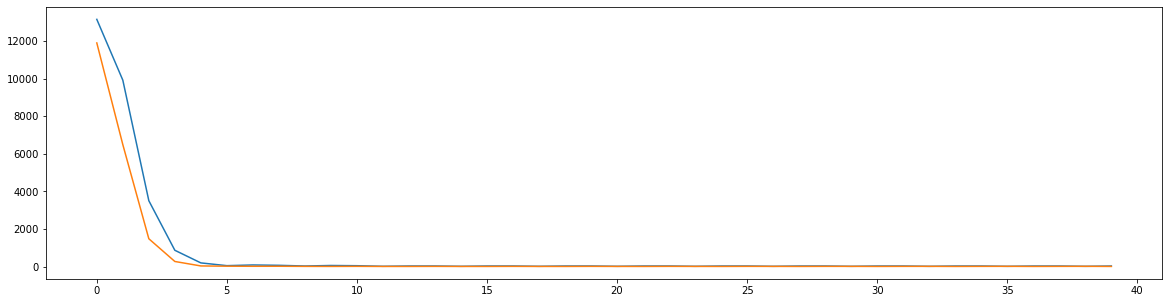

time: 205 ms


In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['figure.figsize'] = (20, 5)

#sns.lineplot(x=range(len(history.history['mean_absolute_percentage_error'])), y='mean_absolute_percentage_error', data=history.history, legend='full')
#plt.show()
sns.lineplot(x=range(len(history.history['loss'])), y='loss', data=history.history, legend='full')
sns.lineplot(x=range(len(history.history['val_loss'])), y='val_loss', data=history.history, legend='full')
plt.show()

In [41]:
lstm_model.save('gs://poc_uc_1/models/lstm_model.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: gs://poc_uc_1/models/lstm_model.model/assets
time: 11 s


In [53]:
lstm_model.ad

TypeError: add_loss() missing 1 required positional argument: 'losses'

time: 25 ms


In [59]:
lstm_model.save('../google_cloud_share/use_case_1_lstm_model.h5', save_format='h5')

time: 30.5 ms


In [54]:
lstm_model.metrics_names

['loss', 'mean_absolute_percentage_error']

time: 2.89 ms


In [56]:
lstm_model.metrics[1].result().numpy()

1.6432533

time: 4.91 ms


In [ ]:
lstm_model.sa

In [152]:
lstm_model.evaluate(val_data_lstm, steps=5000)

5000/5000 [==============================] - 119s 24ms/step - loss: 14086.6777 - mean_absolute_percentage_error: 99.7729


[14086.677734375, 99.77293395996094]

time: 1min 59s


## Inference Examples

### Naive Regression Model

In [57]:
model = tf.keras.models.load_model('gs://poc_uc_1/models/naive_model.model')

time: 11 s


In [58]:
val_samples_input = X.tail(2)
val_samples_labels = Y.tail(2)
print(val_samples_input)
print(val_samples_labels)
model(dict(val_samples_input)).numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'tail'

time: 33.9 ms


### LSTM Model

In [140]:
lstm_model = tf.keras.models.load_model('gs://poc_uc_1/models/lstm_model.model')

time: 14.8 s


In [141]:
val_samples_input = x_val_lstm[-2:]
val_samples_labels = y_val_lstm[-2:]
print(val_samples_input)
print(val_samples_labels)
#test_input = list(val_data_lstm.take(1).as_numpy_iterator())[0]
#print(test_input[0])
lstm_model(val_samples_input)

[[[ 1.20178894e+00 -2.00000000e-01  6.63000000e+01  1.56000000e+01
    5.68000000e+01  0.00000000e+00  6.90000000e+00  1.71000000e+01
    1.79000000e+01  2.06000000e+01  4.48000000e+01  1.15600000e+03
    7.97000000e+01  1.04700000e+03  0.00000000e+00  2.90000000e+00
    1.41400000e+02  1.60000000e+00  5.00000000e-01  2.70000000e+00]
  [ 1.20785393e+00 -2.00000000e-01  7.09000000e+01  2.44000000e+01
    8.03000000e+01  0.00000000e+00  7.00000000e+00  1.70000000e+01
    1.79000000e+01  2.00000000e+01  4.51000000e+01  1.15900000e+03
    8.06000000e+01  1.04700000e+03  0.00000000e+00  2.90000000e+00
    1.27000000e+02  1.20000000e+00  3.00000000e-01  2.40000000e+00]
  [ 1.21188297e+00 -2.00000000e-01  7.16000000e+01  1.56000000e+01
    9.37000000e+01  0.00000000e+00  6.90000000e+00  1.70000000e+01
    1.79000000e+01  2.46000000e+01  4.60000000e+01  1.16200000e+03
    8.17000000e+01  1.04800000e+03  0.00000000e+00  2.90000000e+00
    1.26600000e+02  1.30000000e+00  3.00000000e-01  2.100000

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 80.968864, 146.20819 ],
       [ 80.968864, 146.20819 ]], dtype=float32)>

time: 36.2 ms


In [142]:
import json
write_as_instances = json.dumps(x_val_lstm[-1].tolist())
%store write_as_instances >instances.json

Writing 'write_as_instances' (str) to file 'instances.json'.
time: 2.39 ms


In [143]:
INPUT_DATA_FILE = "instances.json"
MODEL_NAME="poc_uc_1_lstm_model"
VERSION_NAME="initial"

!gcloud ai-platform predict --model $MODEL_NAME \
--version $VERSION_NAME \
--json-instances $INPUT_DATA_FILE

Using endpoint [https://ml.googleapis.com/]
DENSE_6
[80.96885681152344, 146.2081756591797]
time: 18.7 s


### Values with particular time frequency:


a8f608b7

d6150a71

84fb9c76

a8373667

0f59d734

2b5ebd41

54a1f167

c144713d

056af54f

000fb098

c48e9248

e0b14647

3efb49ea

In [162]:
np.append(Y.values, [[81, 147]])

array([ 82.1, 148. ,  82.1, ..., 151. ,  81. , 147. ])

time: 5.82 ms


In [178]:
[df['utc_time'].values[-1], *[81, 147]]

[numpy.datetime64('2019-10-18T06:55:00.000000000'), 81, 147]

time: 2.63 ms


In [165]:
df['utc_time'].values[-1]

numpy.datetime64('2019-10-18T06:55:00.000000000')

time: 2.15 ms
